---
title       : "Assignment: reproducing Grieco & McDevitt (2017)"
subtitle    : 
author      : Paul Schrimpf
date        : `j using Dates; print(Dates.today())`
bibliography: "dialysis.bib"
link-citations: true
options:
      out_width : 100%
      wrap : true
      fig_width : 800
      dpi : 192
---

[![](https://i.creativecommons.org/l/by-sa/4.0/88x31.png)](http://creativecommons.org/licenses/by-sa/4.0/)

This work is licensed under a [Creative Commons Attribution-ShareAlike
4.0 International
License](http://creativecommons.org/licenses/by-sa/4.0/) 

### About this document

This document was created using Weave.jl. The code is available in
[on github](https://github.com/ECON567/Dialysis). The same
document generates both static webpages and a [jupyter
notebook.](dialysis.ipynb)

$$
\def\indep{\perp\!\!\!\perp}
\def\Er{\mathrm{E}}
\def\R{\mathbb{R}}
\def\En{{\mathbb{E}_n}}
\def\Pr{\mathrm{P}}
\newcommand{\norm}[1]{\left\Vert {#1} \right\Vert}
\newcommand{\abs}[1]{\left\vert {#1} \right\vert}
\DeclareMathOperator*{\argmax}{arg\,max}
\DeclareMathOperator*{\argmin}{arg\,min}
\def\inprob{\,{\buildrel p \over \rightarrow}\,} 
\def\indist{\,{\buildrel d \over \rightarrow}\,} 
$$

# Introduction

This assignment will reproduce some of the results of @grieco2017. 

## Getting started 

[https://vse.syzygy.ca](https://vse.syzygy.ca) provides a convenient
browser based interface to Julia. Open it and log in. You now need to
upload the [Jupyter notebook for this assignment](dialysis.ipynb) and
open it. You could download it from that link and then upload to vse.syzygy.ca. 
Alternatively, open a terminal in syzygy (File -> New -> Terminal). This will open a Linux
shell in your browser. To download the notebook to syzygy enter

`
wget https://ubcecon567.github.io/Dialysis/dialysis.ipynb
`


Clicking on the folder icon near the top left of the screen opens a
file browser panel. Use it to open the `dialysis.ipynb` notebook. I
recommend renaming your copy of this notebook. You can rename files by
right clicking in the file browser panel. Now open your copy of the
notebook.

Notebooks consist of a series of "cells" of either text written in
markdown or Julia code. If you double click on any of the text cells,
you can see the markdown that created it. To go back to the formatted
text, execute the cell by either clicking the play icon on the top of
the page or typing ctrl and enter together. 


## Julia resources

This assignment will try to explain aspects of Julia as
needed. However, if at some point you feel lost, you may want to
consult some of the following resources. Reading the first few
sections of either QuantEcon or Think Julia is recommended.

### Resources

- [QuantEcon with Julia](https://lectures.quantecon.org/jl/)

- [Think Julia](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#_colophon) 
  A detailed introduction to Julia and programming more
  generally. Long, but recommended, especially if you're new to
  programming. 

- From the julia prompt, you can access documentation with
  `?functionname`. Some packages have better documentation than
  others. 

- [https://julialang.org/](https://julialang.org/) is the website for
  Julia
  
- Documentation for core Julia can be found at
  [https://docs.julialang.org/en/v1/](https://docs.julialang.org/en/v1/). All
  Julia packages also have a github page. Many of these include
  package specific documentation.

- [Notes on Julia from ECON
  622](https://github.com/ubcecon/ECON622_2019) much of this is part
  of QuantEcon, but not all

- [The Julia Express](https://github.com/bkamins/The-Julia-Express)
  short book with examples of Julia usage
  

# Part I: Loading and exploring the data

## Loading packages

Like many programming environments (R, Python, etc), Julia relies on
packages for lots of its functionality.The following code will
download and install all the packages required for this
assignment (but the packages will still need to be loaded with `using
...`). Execute this cell. It will take some time. While the cell 
is running, there will be a `[*]` to the left of it. This will change
to `[1]` (or some other number) after the cell is finished
running. The number indicates the order in which the cell was
executed. You can execute cells out of order. This can be useful
during development, but you should always make sure that your notebook
works correctly when cells are executed in order before considering it
complete (that is, make sure the "Run -> Restart Kernel and Run all
Cells" menu option produces the output you want). Don't worry about
understanding the details of the code in this section.

In [1]:
using Pkg
try
  Pkg.activate(".")
  using Dialysis # This assignment itself is in the "Dialysis" package. We will use some of the functions from it. 
catch
  Pkg.activate(".")
  Pkg.add(PackageSpec(url="https://github.com/UBCECON567/Dialysis"))
  using Dialysis
end
docdir = normpath(joinpath(dirname(Base.pathof(Dialysis)), "..","docs"))
Pkg.activate(docdir)
Pkg.instantiate()

Activating new environment at `~/.julia/dev/Dialysis/docs/build/Project.toml`


┌ Info: Precompiling Dialysis [9b71aec8-1451-11e9-12ed-579ec60579c4]
└ @ Base loading.jl:1273


Activating environment at `~/.julia/dev/Dialysis/docs/Project.toml`


## Load the data

Now let's get to work. I originally downloaded the data for this
problem set from
[https://dialysisdata.org/content/dialysis-facility-report-data](https://dialysisdata.org/content/dialysis-facility-report-data).
As in @grieco2017 the data comes from Dialysis Facility Reports (DFRs)
created under contract to the Centers for Medicare and Medicaid
Services (CMS). However, there are some differences. Most notably,
this data covers 2006-2014, instead of 2004-2008 as in @grieco2017 .

The R script
[downloadDialysisData.R](https://bitbucket.org/paulschrimpf/econ565/src/master/assignments/production-R/dialysis/downloadDialysisData.R)
downloads, combines, and cleans the data. Unfortunately,
dialysisdata.org has reorganized their website, and the data no longer
seems to be available. Similar (likely identical) data is available
from
[https://data.cms.gov/browse?q=dialysis](https://data.cms.gov/browse?q=dialysis). It
might be useful to look at the documentation included with any of the
"Dialysis Facility Report Data for FY20XX" zip files. Anyway, the
result of the R script is the `dialysisFacilityReports.rda` file
contained in the git repository for this assignment. This R data file
contains most of the variables used by @grieco2017.

In [2]:
using DataFrames  # DataFrames.jl is a package for storing and
                  # interacting with datasets
dialysis = loaddata() # loaddata() is a function I wrote that is part
                      # of Dialysis.jl. It returns a DataFrame
typeof(dialysis)

DataFrame

We will begin our analysis with some exploratory statistics and
figures. There are at least two reasons for this. First, we want to
check for any anomalies in the data, which may indicate an error in
our code, our understanding of the data, or the data itself. Second,
we should try to see if there are any striking patterns in the data
that deserve extra attention. We can get some information about all
the variables in the data as follows

In [3]:
describe(dialysis)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,provfs,,"=""012306""",,"=""682567"""
2,year,2010.23,2006.0,2010.0,2014.0
3,comorbidities,4.70985,0.44444,4.69811,10.7619
4,comorbidities_p3,4.70985,0.44444,4.69811,10.7619
5,hemoglobin,9.77373,3.6,9.7727,18.0
6,hemoglobin_p3,9.77326,3.6,9.7715,18.0
7,std_mortality,1.00545,0.0,0.96694,4.97293
8,std_mortality_p3,1.02017,0.0,0.98193,4.76552
9,std_hosp_days,0.976877,0.0,0.932715,4.94606


The meaning of these variables are as follows:

 Variable | Definition                                            
----------|--------------------------------------------------------
provfs | provider identifier
year | year 
comorbidities | average patient comorbidities
hemoglobin | average patient hemoglobin level
std_mortality | standardized mortality ratio
std_hosp_days | standardized hospitalization days
std_hosp_admit | standardized hospitalization admittance rate
pct_septic | percent of patients hospitalized due to septic infection
n_hosp_admit | number of hospitalizations
n_hosp_patients | 
patient_years_hd | patient years at risk of hospitalization
city | city
name | provider name
state | state
chain_name | name of chain if provider is part of one
profit_status | whether for profit
stations | number of dialysis stations
total_staff | total staff
dieticiansFT | full-time renal dieticians
dieticiansPT | part-time renal dieticians
nurseFT | full-time nurses (>32 hours/week)
nursePT | part-time nurses (<32 hours/week)
ptcareFT | full-time patient care technicians
ptcarePT | part-time patient care technicians
social_workerFT | full-time social workers
social_workerPT | part-time social workers
patient_months | number of patient-months treated during the year
patient_years_rom | patient-years at risk of mortality
pct_fistula | the percentage of patient months in which the patient received dialysis through arteriovenous (AV) fistulae
pct_female | percent of female patients
patient_age | average age of patients
patient_esrd_years | average number of years patients have had end stage renal disease
treatment_type | types of treatment provided at facility 
inspect_date | date of most recent inspection
inspect_result | result of most recent inspection
inspect_cfc_cites | number of condition for coverage deficiencies in most recent inspection
inspect_std_cites | number of standard deficiencies in most recent inspection
days_since_inspection | days since last inspection 

The raw data contains information on many variables in each of the
previous 4 years. Staffing variables with no suffix are staff as of
January 31, year as reported in year + 1.  Staffing variables with
".l1" are staff as of January 31, year - 1 as reported in year +
1. If there were no reporting errors, the .l1 variables would equal
the lag of the ones without .l1. However, you might find that this is
not the case.

As explained in [downloadDialysisData.R](https://bitbucket.org/paulschrimpf/econ565/src/master/assignments/production-R/dialysis/downloadDialysisData.R), data collected in year Y has
information on most variables in years Y-1, Y-2, Y-3, and
Y-4. However, for some variables and survey years, only information in
years Y-2, Y-3, Y-4 is included. For such variables, at year Y-1, I
use the value reported in survey year Y if it is available. If not, I
use the value reported in survey year Y+1. The variables ending with
".p3" instead use the convention to use use Y-2 values if available
and the Y-1 ones if not. Again, if there were no reporting errors the
variables with and without .p3 would be the same. 

There are three variables for the number of patients treated. The data
documentation describes `patient_months` as

"Prevalent Hemodialysis Patient Months (7a): The monthly prevalent
hemodialysis patient count at a facility includes all non-transient
patients (home and in-center) who receive hemodialysis as of the last
day of that calendar month. Incident patients (those who received ESRD
treatment for the first time ever) are included in this count.  Row 7a
reports the number of prevalent hemodialysis patient months  reported
at  the  facility  each  year.  The  number  of  patient  months  over
a  time period  is  the  sum  of  patients  reported  for  the  months
covered  by  the  time  period.  An individual patient may contribute
up to 12 patient months per year."

`patient_years_rom` is the number of patient years at risk of
mortality. `patient_years_hd` is number of patient years at risk of
hospitalization. Since hospitalization data is constructed from
Medicare records, a patient is considered at risk of hospitalization
only when one can be reasonably certain that a hospitalization would
be billed to Medicare. Dialysis patients who pay for for
hospitalization with other methods could have unobserved
hospitalizations. The data guide explains,

"Ideally, this table includes only patients whose Medicare billing
records include all hospitalizations for the period.  To achieve this
goal, we require that patients reach a certain level of Medicare-paid
dialysis bills to be included in hospitalization statistics, or that
patients have Medicare-paid inpatient claims during the period.  For
the purpose of analysis, each patient’s follow-up time is broken into
periods defined by time since dialysis initiation. For each patient,
months within a given period are included if that month in the period
is considered ‘eligible’; a month is deemed eligible if it is within
two months of a month having at least \$900 of Medicare-paid dialysis
claims or at least one Medicare-paid inpatient claim.  In setting this
criterion, our aim is to achieve completeness of information on
hospitalizations for all patients included in the years at risk."

## Create some variables

Not all variables used @grieco2017 are included here. Some
variables will need to be transformed to be comparable to what is in
the paper. For example, net investment in stations in year $t$ is the
difference between the number of stations in year $t+1$ and year in
$t$.

In [4]:
# sort data by :provfs, :year
# function names that end with ! indicate that the function will
# modify one (or more) of its inputs. In this case, sort! modifies the
# dialysis DataFrame
sort!(dialysis, (:provfs, :year))
# things starting with : are Symbols. Names of variables within a
# DataFrame must be Symbols, so they all start with :

# we can access a single column of DataFrame by writing
# dialysis[!,:stations] . This will be a 1 dimensional Array containing
# of length equal to the number of rows in the dialysis DataFrame

# panellag is a function defined in Dialysis.jl it creates lags and
# leads of variables in panel data. It will insert missing values
# where appropriate.

# putting dialysis[!,:invest] on the left will create a new column in
# the dialysis dataframe
dialysis[!,:invest] = panellag(:stations, dialysis, :provfs, :year, -1) -
  dialysis[!,:stations]; # ; prevents the notebook from printing the
# output of the last command. Otherwise, notebooks display the output
# of the last command in each cell.

48224-element Array{Union{Missing, Float64},1}:
   0.0     
   0.0     
   0.0     
    missing
   0.0     
   0.0     
   0.0     
   0.0     
   0.0     
   0.0     
   0.0     
 -10.0     
    missing
   ⋮       
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing

We can also create labor and hiring. Note that the choices of giving
0.5 weight to part-time workers, including social workers, and
weighting all types of staff equally are all somewhat arbitrary and
may not agree exactly with what @grieco2017 did.

In [5]:
dialysis[!,:labor] = (dialysis[!,:nurseFT] + 0.5*dialysis[!,:nursePT]+
                    dialysis[!,:ptcareFT] + 0.5*dialysis[!,:ptcarePT] +
                    dialysis[!,:dieticiansFT] + 0.5*dialysis[!,:dieticiansPT] +
                    dialysis[!,:social_workerFT] + 0.5*dialysis[!,:social_workerPT])
dialysis[!,:hiring] = panellag(:labor, dialysis, :provfs, :year, -1) -
  dialysis[!,:labor];

Creating for profit and chain indicators.

In [6]:
# create a Boolean for profit indicator
dialysis[!,:for_profit] = dialysis[!,:profit_status].=="For Profit"
# The dot in .== is an example of broadcasting. It's very common to
# want to apply the same function to all elements of an
# array. Broadcasting does exactly this. If A is an array, and f() is
# a function that operates on scalars, then f.(A) will apply f to each
# element of A and return an array of the results. The above .==
# compares each element of the array dialysis[!,:profit_status] to the
# scalar string "For Profit"

# similarly create indicators for the two largest chains
dialysis[!,:fresenius] = dialysis[!,:chain_name].=="FRESENIUS"
dialysis[!,:davita] = dialysis[!,:chain_name].=="DAVITA";

State inspection rates are a bit more complicated to create.

In [7]:
using Statistics # for mean, std, and so on 
# first make an indicator for inspected in the last year
dialysis[!,:inspected_this_year] =
  ((dialysis[!,:days_since_inspection].>=0) .&
   (dialysis[!,:days_since_inspection].<365))
# then take the mean by state
stateRates = by(dialysis, [:state, :year],
                # by(data, :var, f) will apply f to each group of data
                # with a different value of :var
                df -> mean(skipmissing(df[!,:inspected_this_year])))
# df -> mean(skipmissing(df[!,:inspected_this_year])) is a shorthand way
# to define a function it's equalivant to
#
# function f(df)
#   mean(skipmissing(df[!,:inspected_this_year]))
# end
#
# skipmissing skips missing values inside a DataFrame. Most arithmetic
# functions will not do what you want if missing values are included.

# rename the variable in the stateRates DataFrame
rename!(stateRates, :x1 => :state_inspection_rate)
# merge the stateRates with the dialysis data
dialysis = join(dialysis, stateRates, on = [:state, :year]);

Creating the number of competitors in the same city is somewhat
similar. Note that @grieco2017 use the number of competitors in the
same HSA, which would be preferrable. However, this dataset does not
contain information on HSAs. If you are feeling ambitious, you could
try to find data linking city, state to HSA, and use that to calculate
competitors in the same HSA.

In [8]:
dialysis[!,:city] = uppercase.(dialysis[!,:city]) 
comps = by(dialysis,[:city,:year],
           df -> mapreduce((x) -> ifelse(ismissing(x),0,1*(x>0)), +, df[!,:patient_months])
           )
rename!(comps, :x1 => :competitors)
dialysis = join(dialysis, comps, on = [:city,:year]);

## Problem 1: Summary statistics

Creata a table (or multiple tables) similar to Tables 1-3 of
@grieco2017. Comment on any notable differences. The following code
will help you get started.

In [9]:
using Statistics

# at the very least, you will need to change this list
vars = [:patient_years_rom, :labor, :hiring]

# You shouldn't neeed to change this function, but you can if you want
function summaryTable(df, vars;
                      funcs=[mean, std, x->length(collect(x))],
                      colnames=[:Variable, :Mean, :StDev, :N])
  # In case you want to search for information about the syntax used here, 
  # [XXX for XXX] is called a comprehension
  # The ... is called the splat operator
  DataFrame([vars [[f(skipmissing(df[!,v])) for v in vars] for f in funcs]...], colnames)  
end
summaryTable(dialysis, vars)

,Variable,Mean,StDev,N
,Any,Any,Any,Any
1,patient_years_rom,67.1459,45.6089,48224
2,labor,13.1744,8.34365,42512
3,hiring,0.422357,4.30587,34665


## Problem 2: exploratory figures

Create some figures to explore the data. Try to
be creative.  Are there any strange patterns or other obvious
problems with the data?

Here are some examples to get started. You may want to look at the
StatPlots.jl, Plots.jl, or VegaLite.jl github pages for more examples.

### Comparing output measures

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1273
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


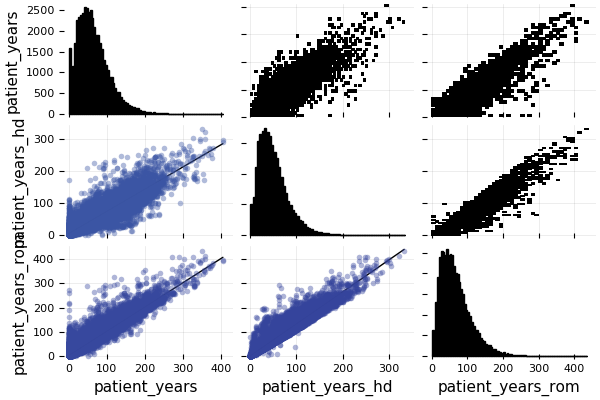

In [10]:
using StatsPlots , Plots
Plots.pyplot()
dialysis[!,:patient_years] = dialysis[!,:patient_months]/12
# missings will mess up corrplot
vars = [:patient_years, :patient_years_hd, :patient_years_rom]
inc = completecases(dialysis[:,vars])
@df dialysis[inc,vars] corrplot(cols(vars))

### Trends over time

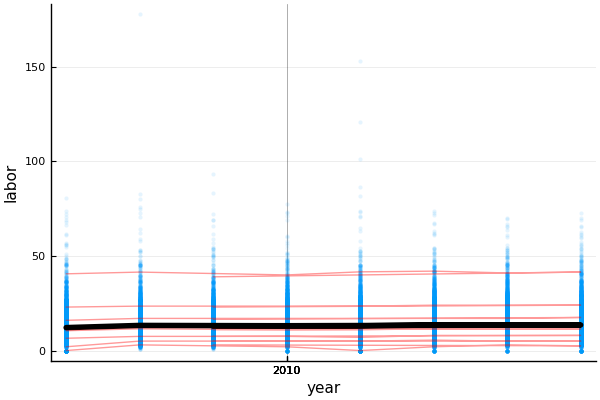

In [11]:
function yearPlot(var)
  data = dialysis[completecases(dialysis[:,[:year, var]]),:]
  scatter(data[!,:year], data[!,var], alpha=0.1, legend=:none,
          markersize=3, markerstrokewidth=0.0)
  yearmeans = by(data, :year,
                 mean = var => x->mean(skipmissing(x)),
                 q01  = var => x->quantile(skipmissing(x), 0.01),
                 q10  = var => x->quantile(skipmissing(x), 0.1),
                 q25  = var => x->quantile(skipmissing(x), 0.25),
                 q50  = var => x->quantile(skipmissing(x), 0.50),
                 q75  = var => x->quantile(skipmissing(x), 0.75),
                 q90  = var => x->quantile(skipmissing(x), 0.9),
                 q99  = var => x->quantile(skipmissing(x), 0.99))
  @df yearmeans plot!(:year, :mean, colour = ^(:black), linewidth=4)
  @df yearmeans plot!(:year, cols(3:ncol(yearmeans)),
                      colour = ^(:red), alpha=0.4, legend=:none,
                      xlabel="year", ylabel=String(var))
end
yearPlot(:labor)

The above plot shows a scatter of labor vs year. The black lines are
average labor each year. The red lines are the 0.01, 0.1, 0.25, 0.5,
0.75, 0.9, and 0.99 quantiles conditional on year.

# Part II: estimating the model

## Problem 3: Quality measures

@grieco2017 use the residuals from regressing the infection rate on
patient characteristics as a measure of quality. Since the infection
rate is a noisy measure of quality, they instrument with the
standardized mortality ratio as a second measure of quality. Medicare
collects the data we are using in part to create the "Dialysis
Facility Compare" website, which is meant to allow consumers to
compare quality of dialysis facilities. Browsing around the [Dialysis
Facility
Compare](https://www.medicare.gov/dialysisfacilitycompare/#profile&pid=522543&pdist=2.0&loc=53129&lat=42.9388315&lng=-87.997164&sort=12%7CASC&dist=0&previouspage=results&profTab=2)
or by looking at the first few pages of a [sample Dialysis Facility
Report](https://data.cms.gov/Medicare/Sample-Dialysis-Facility-Report-for-Current-Year/82bq-h92z),
you will see that there are a number of other variables that Medicare
considers indicators of quality. Pick one of these (it may or may not
be included in the extract of data I provided), and argue for or
against using it instead of or in addition to the septic infection rate and
standardized mortality ratio. 

We can construct residuals from an OLS regression as follows:

In [12]:
"""
    ols_residuals(data::AbstractDataFrame, y::Symbol,
                  x::Array{Symbol,1}; intecept::Bool=true)

This is a doc string. After executing this cell, if you type ?ols_residuals, you
will see this text. 

Calculate residuals from an OLS regression of data[y] on data[x]

Inputs:
 - `data` DataFrame containg y and x
 - `y` Symbol specifying y variable
 - `x` Symbol specifying x variables

Output:
 - Vector of residuals of length = nrow(data)
"""
function ols_residuals(data::DataFrame,  y::Symbol,
                       x::Array{Symbol,1};
                       # arguments following the 
                       # are optional
                       intercept::Bool=true  
                       )
  # The :: are type specifications. They could be left out, and this
  # function would still work just fine. One of their purposes are to
  # document what inputs this function expects, and throw useful error
  # messages if someone tries calling the function on the wrong types.

  inc = completecases(data[:,[y, x...]]) # deal with missing
  Y = disallowmissing(data[inc,y])
  if (intercept) 
    X = [ones(sum(inc)) data[inc,x]]
  else
    X = data[inc,x]
  end
  X = disallowmissing(convert(Matrix, X))
  
  # you can type Greek and some other LaTeX characters by typing their LaTeX
  # code followed by tab, e.g.  \beta<TAB> and \in<TAB>
  β = X \ Y # β ∈ argmin_b || X*b - Y || 
  ϵ = Y - X*β  
  if (any(.!inc)) # add back in missings
    resid = Array{Union{Missing,eltype(ϵ)},1}(undef, nrow(data))
    resid .= missing
    resid[inc] = ϵ
    return(resid)
  else # no missing, just return ϵ
    return(ϵ)
  end
end
q = -ols_residuals(dialysis, :pct_septic, [:days_since_inspection,
                                           :patient_age,
                                           :pct_female,
                                           :patient_esrd_years,
                                           :pct_fistula,
                                           :comorbidities,
                                           :hemoglobin]);

Of course, regression is common enough that there are already Julia
packages for it. I included the `ols_residuals` only for pedagogical
purposes. Whenever there exists a well-used package, it is (usually)
better to use the package than try to write your own functions. Here's
how to accomplish the same thing using FixedEffectModels.jl.

In [13]:
using FixedEffectModels

dialysis[!,:idcat] = categorical(dialysis[!,:provfs])
# FixedEffectModels requires clustering and fixed effect variables to
# be categorical

qreg = reg(dialysis, @formula(pct_septic ~ days_since_inspection + patient_age +
                              pct_female + patient_esrd_years + pct_fistula + comorbidities +
                              hemoglobin), Vcov.cluster(:idcat),save=true) # saves residuals in augmentdf
dialysis[!,:quality] = -qreg.augmentdf[!,:residuals]

# Let's test that these results are the same from ols_residuals
println("Mean absolute difference = $(mean(skipmissing( abs.(q.- dialysis[!,:quality]) )))") 
# using $(expr) in a string will insert the result of expr in the$
# string 

using Test
@test all(skipmissing(q .≈ dialysis[!,:quality])) == true

Mean absolute difference = 5.453941239030147e-14


Test Passed

Testing is an important part of software development. The
[Test.jl](https://docs.julialang.org/en/v1/stdlib/Test/index.html) 
package provides help function for running tests. See [these notes from
622](https://julia.quantecon.org/more_julia/testing.html)
for more information about testing. 

## Problem 4: OLS and fixed effects estimates

Reproduce columns 2,3, 5, and 6 of Table 5. The syntax for fixed
effects regression is shown below:

In [14]:
# you may want to use patient_years_hd or patient_years_rom instead
log_infmiss = x->ifelse(!ismissing(x) && x>0, log(x), missing) # -Inf confuses reg()
dialysis[!,:lpy] = log_infmiss.(dialysis[!,:patient_months]./12)
dialysis[!,:logL] = log_infmiss.(dialysis[!,:labor])
dialysis[!,:logK] = log_infmiss.(dialysis[!,:stations])

# you may want to restrict sample to match sample that can be used in model estimates 
reg(dialysis, @formula(lpy ~ quality + logK + logL + fe(idcat)), Vcov.cluster(:idcat))

                           Fixed Effect Model                           
Number of obs:                32013   Degrees of freedom:               4
R2:                           0.882   R2 Adjusted:                  0.882
F Statistic:                312.361   p-value:                      0.000
R2 within:                    0.144   Iterations:                       1
Converged:                     true   
            Estimate   Std.Error  t value Pr(>|t|)  Lower 95%   Upper 95%
-------------------------------------------------------------------------
quality  -0.00921389 0.000589458 -15.6311    0.000 -0.0103692 -0.00805853
logK        0.171904    0.028534  6.02452    0.000   0.115976    0.227831
logL        0.470537   0.0171159  27.4912    0.000    0.43699    0.504085


Be sure to add the other columns. If you'd like, you could use
[RegressionTables.jl](https://github.com/jmboehm/RegressionTables.jl)
to produce tables that look a lot like the ones in the paper. 

## Estimation of $\alpha$

As discussed in section 5 of @grieco2017, the coefficient on quality,
$\alpha$, is estimated from 
$$
y_{jt} = \alpha q_{jt} + \Phi(\underbrace{h_{jt}, k_{jt}, l_{jt}, x_{jt}}_{w_{jt}}) +
\epsilon_{jt}
$$
with a second noisy measure of quality, $z_{jt}$, used to instrument
for $q_{jt}$. To estimate $\alpha$, first the exogenous variables,
$w$, can be partialed out to give:
$$
y_{jt} - \Er[y_{jt} | w_{jt} ] = \alpha (q_{jt} - \Er[q_{jt}|w_{jt}]) +
\epsilon_{jt}
$$
where we used the assumption that $\Er[\epsilon_{jt} | w_{jt} ] = 0$
and the fact that $\Er[\Phi(w) | w] = \Phi(w)$. Under the assumption
that $\Er[\epsilon| z, w] = 0$, we can estimate $\alpha$ based on the
moment condition:
$$
\begin{align*}
0 = & \Er[\epsilon f(z,w) ] \\
0 = & \Er\left[ \left(y_{jt} - \Er[y_{jt} | w_{jt} ] - \alpha
(q_{jt} - \Er[q_{jt}|w_{jt}])\right) f(z_{jt},w_{jt}) \right]
\end{align*}
$$
If $Var(\epsilon|z,w)$ is constant, the efficient choice of $f(z,w)$
is 
$$
\Er[\frac{\partial \epsilon}{\partial \alpha} |z, w ] = \Er[q| z, w] - \Er[q|w]
$$
To estimate $\alpha$, we simply replace these conditional expectations with
regression estimates, and replace the unconditional expectation with a
sample average. Let $\hat{\Er}[y|w]$ denote a nonparmetric estimate of
the regression of $y$ on $w$. Then, 
$$
\hat{\alpha} = \frac{\sum_{j,t} (y_{jt} -
\hat{E}[y|w_{jt}])(\hat{E}[q|z_{jt},w_{jt}] - \hat{E}[q|w_{jt}])} 
{\sum_{j,t} (q_{jt} - \hat{E}[q|w_{jt}])(\hat{E}[q|z_{jt},w_{jt}] - \hat{E}[q|w_{jt}])} 
$$
The function `partiallinearIV` in Dialysis.jl will estimate this
model. Also included are two methods for estimating
$\hat{E}[y|w]$. `polyreg` estimates a polynomial series regression,
that is it regresses $y$ on a polynomial of degree $d$ in $w$. To
allow the regression to approximate any function, the degree must
increase with the sample size, but to control variance, the degree must
not increase too quickly. We will not worry too much about the choice
of degree here. 

An alternative method (and what @grieco2017 used) is
local linear regression. To estimate $\hat{E}[y|x_{jt}]$, local linear
regression estimates a linear regression of $y$ on $x$, but weights
observations by how close $x_{it}$ is to $x_{jt}$. That is, 
$$
\hat{E}[y|x_{jt}] = x_{jt} \hat{\beta}(x_jt) 
$$
where 
$$
\hat{\beta}(x_jt) = \argmin_\beta \sum_{i,t} (y_{it} -
x_{it}\beta)^2 k((x_{it} - x_{jt})/h_n)
$$
Here $k()$ is some function with its maximum at 0 (and has some other
properties), like $k(x) \propto e^{-x^2}$. The bandwidth, $h_n$,
determines how much weight to place on observations close to vs far
from $x_{jt}$. Similar to the degree in polynomial regression, the
bandwidth must decrease toward 0 with sample size allow local linear
regression to approximate any function, but to control variance the
bandwidth must not decrease too quickly. We will not worry too much
about the choice of bandwidth. Anyway, the function `locallinear` in
Dialysis.jl estimates a local linear regression. 

## Problem 5: $\alpha$

Estimate $\alpha$ using the following code. You may want to modify
some aspects of it and/or report estimates of $\alpha$ for different
choices of instrument, nonparametric estimation method, degree or
bandwidth. Compare your estimate(s) of $\alpha$ with the ones in
Tables 5 and 6 of @grieco2017.

In [15]:
# create indicator for observations usable in estimation of α
inc1 = ((dialysis[!,:patient_months] .> 0) .& (dialysis[!,:labor] .> 0) .&
           (dialysis[!,:stations] .> 0) .&
           .!ismissing.(dialysis[!,:quality]) .&
           .!ismissing.(dialysis[!,:std_mortality]) .&
           (dialysis[!,:invest].==0) .&
           (dialysis[!,:hiring].!=0));
inc1[ismissing.(inc1)] .= false;
dialysis[!,:inc1] = inc1;

dialysis[!,:lsmr] = log.(dialysis[!,:std_mortality] .+ .01)
# As degree → ∞ and/or bandwidth → 0, whether we use :std_mortality or
# some transformation as the instrument should not matter. However,
# for fixed degree or bandwidth it will have some (hopefully small)
# impact. 

(α, Φ, αreg, eyqz)=partiallinearIV(:lpy,  # y 
                         :quality, # q
                         :lsmr,   # z
                         [:hiring, :logL, :logK,
                         :state_inspection_rate, :competitors], # w
                         dialysis[findall(dialysis[!,:inc1]),:];
                         npregress=(xp, xd,yd)->polyreg(xp,xd,yd,degree=1),
                         parts=true                      
                         # You may want to change the degree here
                         #
                         # You could also change `polyreg`  to
                         # `locallinear` and `degree` to
                         # `bandwidthmultiplier`
                         #
                         # locallinear will likely take some time to
                         # compute (≈350 seconds on my computer)
                         ) 

# we will need these later in step 2
dialysis[!,:Φ] = similar(dialysis[!,:lpy])
dialysis[:,:Φ] .= missing
rows = findall(dialysis[!,:inc1])
dialysis[rows,:Φ] = Φ
dialysis[!,:ey] = similar(dialysis[!,:lpy])
dialysis[:,:ey] .= missing
dialysis[rows,:ey] = eyqz[:,1]
dialysis[!,:eq] = similar(dialysis[!,:lpy])
dialysis[:,:eq] .= missing
dialysis[rows,:eq] = eyqz[:,2]
dialysis[!,:ez] = similar(dialysis[!,:lpy])
dialysis[:,:ez] .= missing
dialysis[rows,:ez] = eyqz[:,3]

α

-0.016731503377462428

## Brief introduction to GMM

The coefficients on labor and capital are estimated by GMM. The idea
of GMM is as follows. We have a model that implies 
$$
\Er[c(y,x;\theta) | z ] = 0
$$
where $y$, $x$, and $z$ are observed variables. $c(y,x;\theta)$ is
some known function of the data and some parameters we want to
estimate, $\theta$. Often, $c(y,x;\theta)$ are the residuals from some
equation. For example, for linear IV, we'd have
$$ c(y,x;\theta) = y - x\theta $$ 
The conditional moment restriction above implies that
$$
\Er[c(y,x;\theta)f(z) ] = 0
$$
for any function $f()$. We can then estimate $\theta$ by replacing the
population expectation with a sample average and finding
$\hat{\theta}$ such that
$$
\En[c(y,x;\hat{\theta})f(z) ] \approx 0
$$
The dimension of $f(z)$ should be greater than or equal to the
dimension of $\theta$, so we have at least as many equations as
unknowns. We find this $\hat{\theta}$ by minimizing a quadratic form
of these equations. That is,
$$
\hat{\theta} = \argmin_\theta \En[g_i(\theta)] W_n \En[g_i(\theta)]'
$$
were $g_i(\theta) = c(y_i, x_i;\theta)f(z_i)$, and $W_n$ is some
positive definite weighting matrix. 


## Problem 6: OLS by GMM

As practice with GMM, use it to estimate a simple regression model, 
$$
y = x\beta + \epsilon
$$
assuming $\Er[\epsilon|x] = 0$. Test your code on simulated data. The
following will help you get started.

In [16]:
function sim_ols(n; β = ones(3))
  x = randn(n, length(β))
  ϵ = randn(n)
  y = x*β + ϵ
  return(x,y)
end
β = ones(2)
(x, y) = sim_ols(100; β=β)
βols = (x'*x) \ (x'*y)

function gmm_objective(β)
  gi = (y - x*β) .* x
  Egi = mean(gi, dims=1)
  error("This is incomplete; you must finish it")

  # It is is likely that the code you will write will return a 1 x 1,
  # 2 dimensional array. For compatibility with Optim, you need to
  # return a scalar. If foo is a 1x1 array, write `foo[1]` to return a scalar instead of
  # 1x1 array
end

# minimizer gmm_objective
using Optim # github page : https://github.com/JuliaNLSolvers/Optim.jl
# docs : http://julianlsolvers.github.io/Optim.jl/stable/
try 
  res = optimize(gmm_objective,
                 zeros(size(β)), # initial value
                 BFGS(), # algorithm, see http://julianlsolvers.github.io/Optim.jl/stable/
                 autodiff=:forward)
  βgmm = res.minimizer
catch err
  @info err
  βgmm = βols
  res = nothing
end
@test βgmm ≈ βols
res

┌ Info: ErrorException("This is incomplete; you must finish it")
└ @ Main In[16]:32


Error During Test at In[16]:36
  Test threw exception
  Expression: βgmm ≈ βols
  UndefVarError: βgmm not defined
  Stacktrace:
   [1] top-level scope at In[16]:36
   [2] eval at ./boot.jl:330 [inlined]
   [3] softscope_include_string(::Module, ::String, ::String) at /home/paul/.julia/packages/SoftGlobalScope/cSbw5/src/SoftGlobalScope.jl:218
   [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/paul/.julia/packages/IJulia/F1GUo/src/execute_request.jl:67
   [5] #invokelatest#1 at ./essentials.jl:709 [inlined]
   [6] invokelatest at ./essentials.jl:708 [inlined]
   [7] eventloop(::ZMQ.Socket) at /home/paul/.julia/packages/IJulia/F1GUo/src/eventloop.jl:8
   [8] (::IJulia.var"#15#18")() at ./task.jl:333
  


Test.FallbackTestSetException: There was an error during testing

## Estimating $\beta$

The model
implies that 
$$
\omega_{jt} = \Phi(w_{jt}) - \beta_k k_{jt} - \beta_l l_{jt} 
$$ 
and 
$$
y_{jt} - \alpha q_{jt} - \beta_k k_{jt} - \beta_l l_{jt} =
g(\omega_{jt-1}) + \eta_{jt} 
$$ {#eq:eta}
The timing and exogeneity assumptions imply that 
$$
\Er[\eta_{jt} | k_{jt}, l_{jt}, w_{jt-1}]
$$
Given a value of $\beta$, and our above estimates of $\Phi$ and
$\alpha$, we can compute $\omega$ from the equation above, and then estimate
$g()$ and $\eta$ by a nonparametric regression of
$y_{jt} - \alpha q_{jt} - \beta_k k_{jt} - \beta_l l_{jt}$ on
$\omega_{jt-1}$. $\beta$ can then be estimated by finding the value of
$\beta$ that comes closest to satisfying the moment condition
$$
\Er[\eta(\beta)_{jt} k_{jt}] = 0 \text{ and } \Er[\eta(\beta)_{jt} l_{jt}]
= 0
$$
To do this, we minimize 
$$
Q_n(\beta) = \left( \frac{1}{N} \sum_{j,t} \eta(\beta)_{jt} (k_{jt}, l_{jt}) \right) W_n 
\left( \frac{1}{N} \sum_{j,t} \eta(\beta)_{jt} (k_{jt}, l_{jt}) \right)'
$$


## Problem 7: estimate $\beta$

Write the body of the $Q_n(\beta)$ function below. Use it to estimate
$\beta$. Compare your results with those of @grieco2017. Optionally,
explore robustness of your results to changes in the specification.

In [17]:
# indicator for observations usable in estimation of β
dialysis[!,:inclag] = panellag(:inc1, dialysis, :provfs, :year, 1);
dialysis[!,:inc2] = (dialysis[!,:inclag] .&
                   (dialysis[!,:stations].>0) .&
                   (dialysis[!,:labor].>0) .&
                   (dialysis[!,:patient_years].>0) .&
                   .!ismissing.(dialysis[!,:quality]));
dialysis[ismissing.(dialysis[!,:inc2]),:inc2] .= false;

(ωfunc, ηfunc) = errors_gm(:lpy, :logK, :logL, :quality, :Φ, :provfs, :year,
                           dialysis, α; degree=1)
function Qn(β)
  η = ηfunc(β)
  error("You must write the body of this function")
end

using Optim
try 
  res = optimize(Qn,    # objective
                 [0.0, 0.0], # lower bounds, should not be needed, but
                 # may help numerical performance 
                 [1.0, 1.0], # upper bounds 
                 [0.4, 0.2], # initial value               
                 Fminbox(BFGS()),  # algorithm
                 autodiff=:forward)
  β = res.minimizer
  @show β
catch err
  @info err
  res = nothing
  β = nothing
end
res

┌ Info: ErrorException("You must write the body of this function")
└ @ Main In[17]:29


UndefVarError: UndefVarError: res not defined

## Inference

Since the estimation above consists of multiple steps, constructing
standard errors is not quite as simple as for single step
estimators. The estimate of $\beta$ in the second step depends on the
first step estimate of $\alpha$, so the uncertainty in the first step
estimate of $\alpha$ can affect the standard error of $\beta$. It is
possible to derive a formula for the asymptotic standard error of
$\beta$ that takes all this into account, but the formula is somewhat
long. See [these notes for details](dialysis-inference). The somewhat
long formula for asymptotic standard errors, has lead many applied
economists to instead use the bootstrap to compute the standard error
of multiple step estimators. Here are some of my notes about 
[bootstrap along with Julia code](https://schrimpf.github.io/GMMInference.jl/bootstrap/).